# Insect Community Ecology - How To.

As per normal, before you begin please open the command palette (by pressing the keyboard icon) and make your own copy of this notebook. This exercise will give you some hands-on experience analyzing insect community data. It is in two parts. In the first part, we'll do some basic network visualization and characterization. In the second part, we'll analyze a pollination network to help make conservation decisions. 

## Part 1. Some basic network visualization and characterization.

Start by loading a special R library for bipartite network analysis.

In [1]:
library(bipartite)

Loading required package: vegan
Loading required package: permute
Loading required package: lattice
This is vegan 2.4-2
Loading required package: sna
Loading required package: statnet.common
Loading required package: network
network: Classes for Relational Data
Version 1.13.0 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.

sna: Tools for Social Network Analysis
Version 2.4 created on 2016-07-23.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.

 This is bipartite 2.07
 For late

In addition to a bunch of usefull functions, this library ships with some built-in insect-plant pollination networks. Let's load the same Brazillian oil-plant pollination network that I played around with in the Canvas lesson.

In [2]:
data(bezerra2009)
##and let's give it a shorter variable name
web <- bezerra2009

Let's visualize. First, we'll plot the network as a matrix, with cells shaded according to interaction strength (basically a heat map). Then we'll plot the network as a bipartite graph. (These should look familiar).

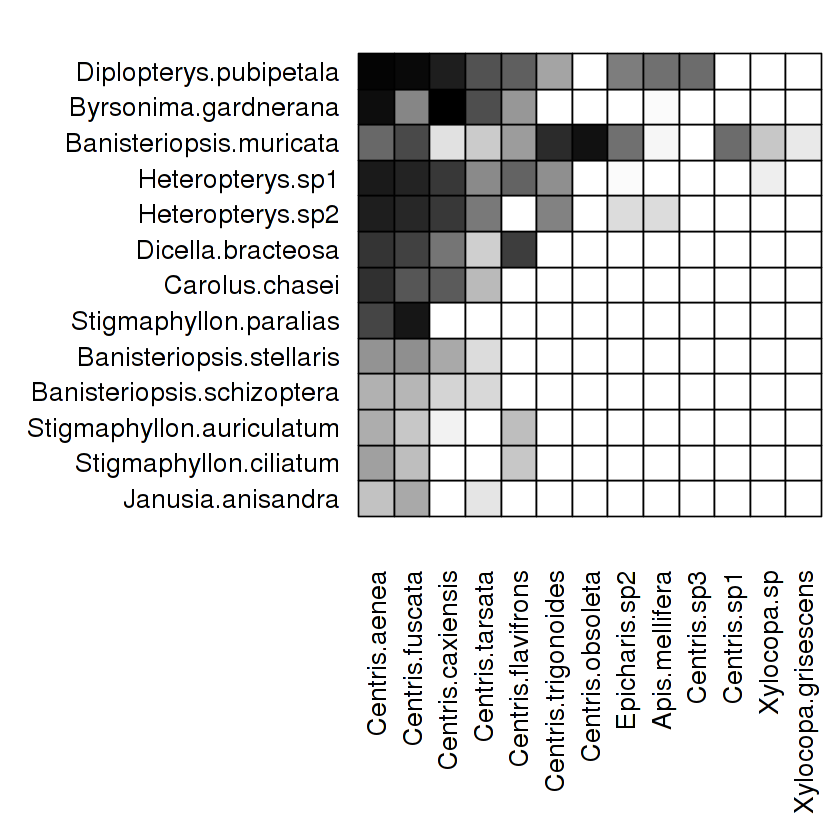

In [81]:
visweb(web)

Note that species are sorted by their degree. With a plot like this it's relatively easy to see the relationship between species degree (the number of species it interacts with) and average species interaction strength (the how often a particular interaction occurs). What do you notice about this relationship? Pause here to answer Question 1 of the Canvas Quiz.

OK. Now let's look at a bipartite graph.

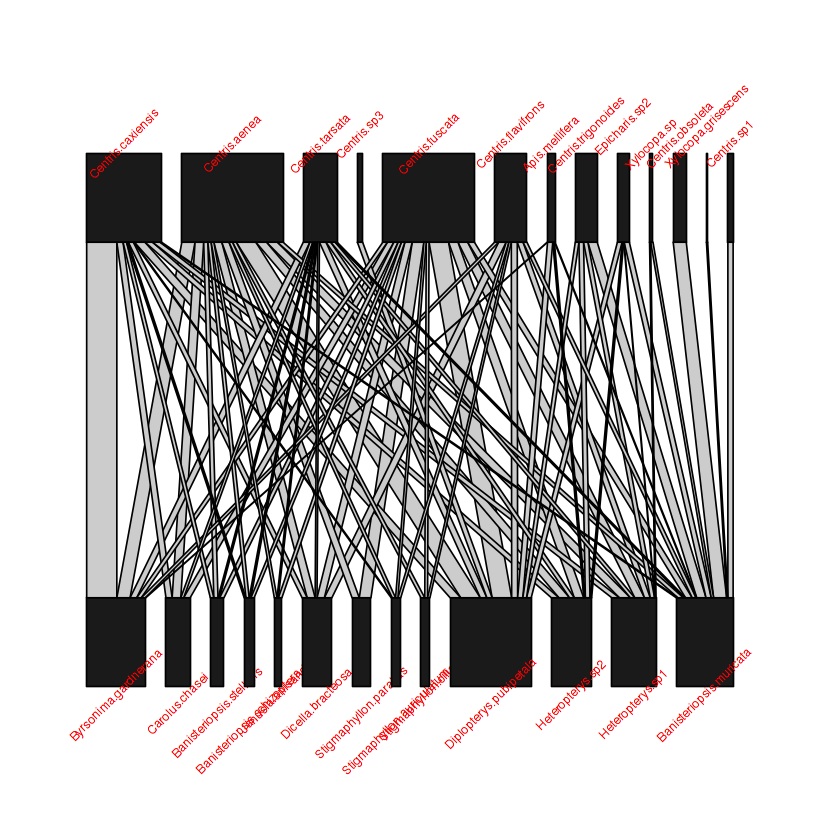

In [82]:
plotweb(web, text.rot=45, text.high.col='red', text.low.col='red')


Complex!

OK. One of the more mathematical subjects in the Canvas lecture was the Shanon's entropy index of diversity. To improve our understanding of it, let's write out own code to compute Shanon's entropy (*H'*) for the diversity of the upper trophic level, that is the pollinators, in the Bezzera 2009 network. Recall that *H'* = -1 * sum(p.i * ln(p.i)).

The web object that we defined above is an R *matrix*. Each matrix row corresponds to an oil-plant species. Each matrix column corresponds to an insect pollinator species. What we can do then is sum up all of the interactions in each column. That will give us the total number of flower visits for each pollinator species. Dividing each column sum by the grand total of all flower visits will give us proportion of flower visits accounted for by each pollinator. Implementing the rest of the equation is straightforward.

In [83]:
visits <- colSums(web) #add up all the flower visits for each pollinator species
all.visits <- sum(visits) # add up all of the visits in the whole matrix
p.i <- visits / all.visits #compute the proportion of all visits accounted for by each pollinator
h.prime <- -1 * sum(p.i * log(p.i)) #plug those proportions into our equation for H'
sprintf("H for our Brazillian bee community is %s", h.prime) #just print the value

[1] "H for our Brazillian bee community is 2.02708102485604"

Bee species eveness, *E*, is H.prime / Hmax, which equals H.prime / ln(S). (You can take my word for it.)

In [84]:
S = length(colnames(web)) #a way to get the number of pollinator species in the network. 
E = h.prime / log(S) #our formula for E
sprintf("E for our Brazillian bees = %s", E) #print it

[1] "E for our Brazillian bees = 0.790300603385864"

Recall from the lecture than *E* is a measure of species abundance evenness, ranging from 0 to 1, and with 0 cooresponding to the greatest possible abundance disparity and 1 correspoding the the least possible abdundance disparity. If all species are equally abundant, it will be the hardest to predict the diversity of a randomly sampled individual. An E value of ~0.8 is pretty high. The diversity of Brazillian oil-plant pollinators is pretty even!

The *bipartite* package was designed to make it easy to graph networks, and to compute a wide array of neytwork metrics, incuding the ones we talked about in the Canvas lesson (degree, diversity, eveness, nestedness, modularity, conectedness) and many others. We can caluclate the species-level metrics with the function specieslevel(), and the network-level metrics with the function networklevel(). Let's look at the species-level ones.

In [85]:
specieslevel(web, level='higher')

,degree,normalised.degree,species.strength,interaction.push.pull,nestedrank,PDI,resource.range,species.specificity.index,PSI,node.specialisation.index.NSI,betweenness,weighted.betweenness,closeness,weighted.closeness,Fisher.alpha,partner.diversity,effective.partners,proportional.generality,proportional.similarity,d
Centris.aenea,13,1.00000000,3.85897605,0.21992123,0.00000000,0.6525341,0.0000000,0.1739007,0.27565639,1.000000,0.125,0.55555556,0.07894737,0.098764179,1.5419193,2.3976083,10.996844,1.09319896,0.8910417,0.03943720
Centris.fuscata,13,1.00000000,3.67846195,0.20603553,0.08333333,0.6925709,0.0000000,0.1873292,0.28823096,1.000000,0.125,0.00000000,0.07894737,0.096063008,1.5630676,2.3809025,10.814659,1.07508792,0.8331182,0.08393483
Centris.caxiensis,10,0.76923077,1.99058800,0.09905880,0.16666667,0.8763441,0.2500000,0.3897633,0.31102920,1.000000,0.125,0.01587302,0.07894737,0.084481583,1.1922187,1.8621462,6.437538,0.63995727,0.7068835,0.20114999
Centris.tarsata,10,0.76923077,1.10469655,0.01046965,0.25000000,0.6580460,0.2500000,0.2465898,0.10503316,1.000000,0.125,0.00000000,0.07894737,0.064549689,1.3368991,2.1441412,8.534709,0.84843750,0.8013268,0.06852825
Centris.flavifrons,7,0.53846154,1.14803590,0.02114799,0.33333333,0.7239186,0.5000000,0.3047642,0.15660108,1.000000,0.125,0.00000000,0.07894737,0.063967061,0.8932982,1.8760698,6.527799,0.64893007,0.6591134,0.19728983
Centris.trigonoides,4,0.30769231,0.42171753,-0.14457062,0.41666667,0.8875256,0.7500000,0.4828370,0.12080438,1.000000,0.125,0.42857143,0.07894737,0.072034042,0.4980227,1.3104063,3.707680,0.36858137,0.5168751,0.24489795
Centris.obsoleta,1,0.07692308,0.22960725,-0.77039275,0.75000000,1.0000000,1.0000000,1.0000000,0.22960725,1.083333,0.000,0.00000000,0.07565789,0.061918929,0.1109311,0.0000000,1.000000,0.09941025,0.1407313,0.57130833
Epicharis.sp2,4,0.30769231,0.19987023,-0.20003244,0.50000000,0.8919414,0.7500000,0.5575651,0.06864946,1.000000,0.125,0.00000000,0.07894737,0.041380204,0.5452777,1.1169173,3.055421,0.30374013,0.4745359,0.21626307
Apis.mellifera,4,0.30769231,0.12337780,-0.21915555,0.58333333,0.9569597,0.7500000,0.6672703,0.05227391,1.000000,0.125,0.00000000,0.07894737,0.030028599,0.5837046,0.9552391,2.599292,0.25839626,0.4307466,0.21407455
Centris.sp3,1,0.07692308,0.06497175,-0.93502825,0.83333333,1.0000000,1.0000000,1.0000000,0.06497175,1.333333,0.000,0.00000000,0.06578947,0.022588393,0.1252172,0.0000000,1.000000,0.09941025,0.2006803,0.37006116


That's a lot of info! And we only calcuated values for the upper tropic level. Each polinator gets its own row. Each column specifies values for a species-level network metric. For example, the first column gives the degree of each species. Recall that that is a count direct links with species in the other trophic level. Hence, *Centris aenea* visits flowers from 13 plants species, whereas *Apis melifer* visits only four plant species. Scroll to the right, and you'll find a column for betweeness. For explanations of the other metrics you can consult the [manual](https://cran.r-project.org/web/packages/bipartite/bipartite.pdf), or this [paper](https://www.researchgate.net/publication/284699528_How_to_be_a_specialist_Quantifying_specialisation_in_pollination_networks/fulltext/57aa9cb208ae7a6420bd2945/How-to-be-a-specialist-Quantifying-specialisation-in-pollination-networks.pdf) by the developer. We'll define another one or two in the next part of this exercise.

## Part 2. Pollinator conservation problems.

Now we'll use our community-ecology skills to try and solve some real problems (or at least toy versions of real problems). We'll do this with a larger pollination network, of a British meadow, published by Jane Memmott in 1999.

In [86]:
data(memmott1999)
w <- memmott1999
dim(w) #print the dimensions of the interaction matrix

[1] 25 79

That's 25 plant species and 79 insect pollinators.

### Mitigate adverse effects of a housing development

Imagine that a firm is going to build a housing development on this British meadow. The local government has allowed this development with the stipulation that efforts are made to conserve the native flora. You've been brought on as a consultant. The firm plans to use native plants for landscaping. But dealing with more than a couple native plant species would not be feasible. Your job is the identify the one or two plant species that are most likely to stabilize the flora. In particular, as an entomologist, your job is to predict how the pollination network could be upset, and identify the plants which are most important in keeping pollination services humming.

The approach you take is to simulate extinction. With Memmott's network in hand, you systematically delete plant species, and note any secondary pollinator extinctions that are likely to occur. Such extinctions would happen when none of a pollintor's current host plants are left in a network. You do three different simulations, each with a different ordering of plant extinctions. In the first, you go by order of increasing interaction strength; in other words, you start with the plant that is least popular with pollinators, and move on up to the plant that is most popular. In the second, you kill off plant species at random. In the third, you go in decreasing order of degree -- that is you start with the plant visited by the greatest number of pollinator species, and go on down the list.

The R package bipartite happens to provide a function for this kind of analysis, called *second.extinct()*. Passing the result of this function to another function, *slope.bipartite()*, will plot the effect of extinction in one trophic level on the species richness of the other. And the function *robustness()* gives the area under the curve in this plot. If all plant extinctions had no effect on pollinator species richness, robustness would equal one. If the first extinction wiped out all pollinator species, robustness would equal zero. Got it? Let's do it.

[1] "secondary extinction rate = 15.2171351622126"

[1] "robustness = 0.926333180718271"

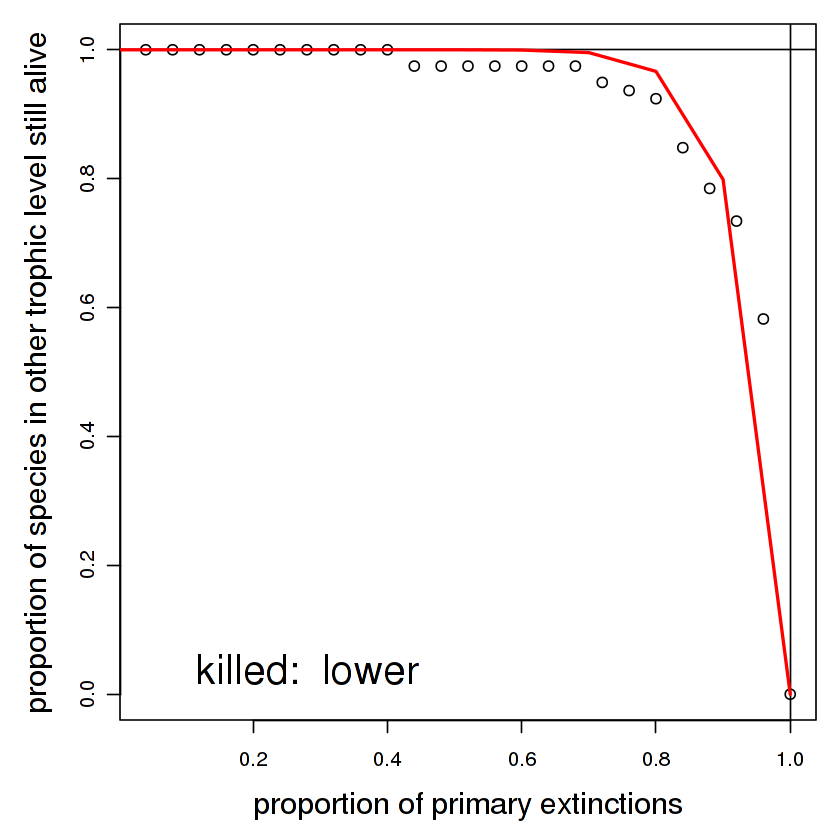

In [92]:
x <- second.extinct(w, participant='lower', method='abundance')
sprintf('secondary extinction rate = %s', slope.bipartite(x))
sprintf('robustness = %s', robustness(x))

Simulation 2 (in order of increasing interaction frequency)

[1] "secondary extinction rate = 2.00296895314407"

[1] "robustness = 0.663419342772083"

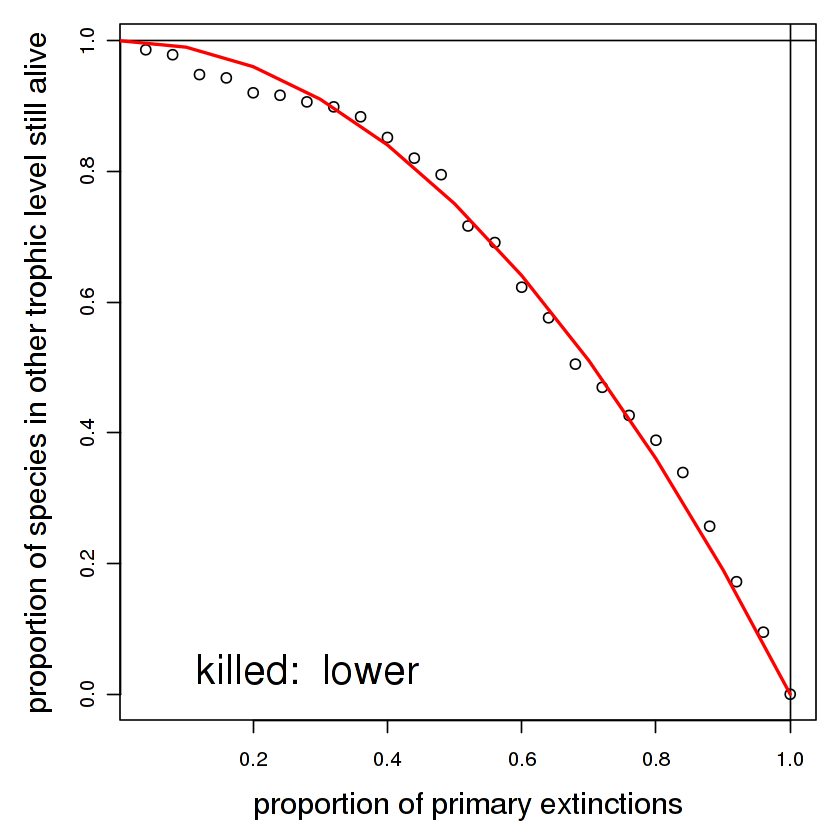

In [93]:
x <- second.extinct(w, participant='lower', method='random')
sprintf('secondary extinction rate = %s', slope.bipartite(x))
sprintf('robustness = %s', robustness(x))

Simulation 3 (in random order)

[1] "secondary extinction rate = 0.574997050335378"

[1] "robustness = 0.36157663438691"

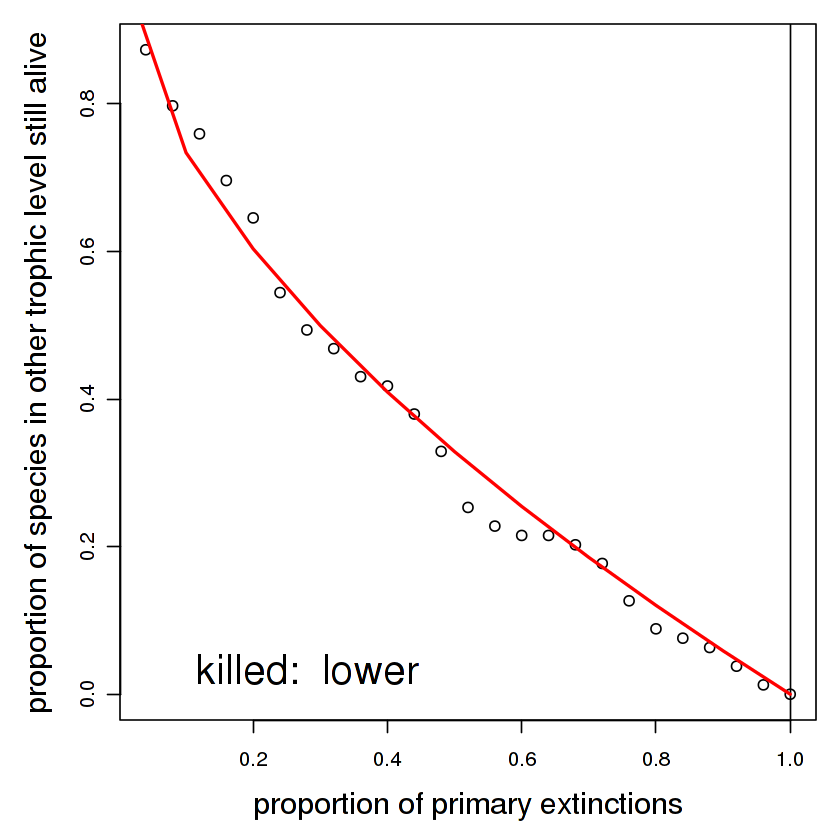

In [94]:
x <- second.extinct(w, participant='lower', method='degree')
sprintf('secondary extinction rate = %s', slope.bipartite(x))
sprintf('robustness = %s', robustness(x))

OK. Here are the top ten plant species in terms of degree and species strength.

In [95]:
metrics <- specieslevel(w, level='lower')
nu <- metrics[order(-metrics$degree, -metrics$species.strength),]
keepers <- c('degree','species.strength')
psi <- nu[keepers]
head(psi, 10)

,degree,species.strength
Daucus.carota,46,28.4381857
Leontodon.hispidus,34,11.8630163
Torilis.japonica,25,5.5146577
Eupatorium.cannabinum,23,7.5067697
Centaurea.nigra,20,5.8130738
Knautia.arvensis,20,3.6082263
Trifolium.pratense,17,4.6468636
Leontodon.autumnalis,13,1.8573283
Aethusa.cynapium,12,0.8025979
Crepis.capillaris,12,0.4015313


Study the plots and robustness estimates. Which extinction scenario represents the best case for community stability? Which is the worst?

If you had to pick one plant species to include the landscaping plans that has the best chance of conserving the local pollination network what would it be? Pause here and enter your answer in the Canvas Quiz.

### Rearing pollinators for habitat restoration 

We'll keep close to Memmott's British meadow. Suppose that on the other side of town, a deceased landowner has donated her estate to a nature conservancy with the expressed purpose of restoring it to native meadow. As part of that effort, you have been brought on as a cosultant to determine which bee species will be the most efficacious pollinator, and will be selecting for a mass rearing and release opperation. (Assume that bees can't just immigrate to the new meadow.)

To make your recommendation, you decide to use the Memmott network to calculate for each bee species the Pollination Service Index (PSI) which is a measure that takes into account both interaction strength, and interaction specificity. The basic idea here is that when plants are visited by a hub-like, generalist pollinator, they get a mix of pollen from many plants in the community. The proportion of pollen from conspecifics could be relatively low. Hence, frequent visits from such a generalist might deliver less useable pollen than infrequent visits from a more specialized pollinator. Make sense? To calcute the effecacy of a pair-wise interaction between a plant and pollinator, we find the proportion of pollinator X's visits accounted for by plant Y, and the proportion of plant Y's visitors accounted for by pollinator X. And to find network-level PSI of pollinator X, we would just sum these efficacies across all plant species.

PSI is one of the things that get's calulated by bipartite specieslevel function.

In [96]:
psi.df <- specieslevel(w, index='PSI', level='higher')
psi <- psi.df$PSI
names(psi) <- rownames(psi.df)
psi.ordered <- sort(psi, decreasing=TRUE)
head(psi.ordered)

Platycheirus.clypeatus         Diptera.spec14       Bombus.pascuorum 
             0.4803920              0.2857143              0.2379764 
        Diptera.spec22  Sphaerophoria.scripta Platycheirus.albimanus 
             0.2328671              0.2224358              0.1898501

Wonder how PSI related to degree? Let's have a look.


Call:
lm(formula = foo$PSI ~ foo$degree)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05561 -0.02724 -0.02233 -0.00772  0.43538 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.017884   0.011500   1.555    0.124    
foo$degree  0.009041   0.002168   4.170 7.91e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07162 on 77 degrees of freedom
Multiple R-squared:  0.1842,	Adjusted R-squared:  0.1737 
F-statistic: 17.39 on 1 and 77 DF,  p-value: 7.905e-05


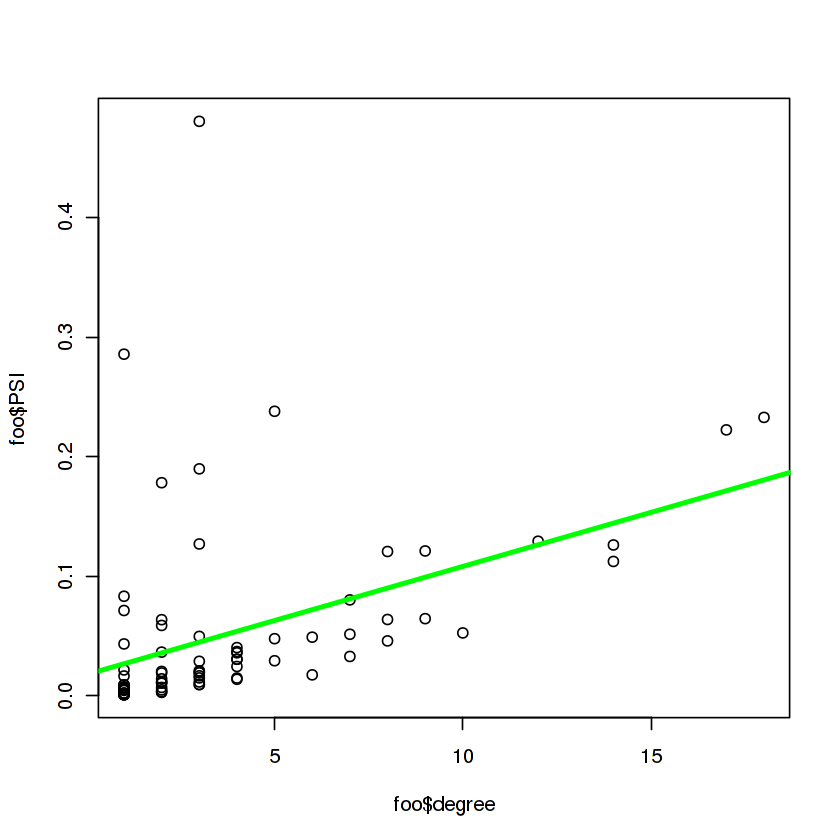

In [97]:
foo <- specieslevel(w, level='higher')
m.0 <- lm(foo$PSI ~ foo$degree)
plot(foo$PSI ~ foo$degree)
abline(m.0, lwd=3, col='green')
summary(m.0)

OK, so PSI and degree are related, but not perfectly so. From our earlier analyses we noted that high degree species are really important in holding a pollination network together. But the PSI statistic is getting at the fact that the higher degree species might not be the greatest at pollinating specific flowers. To take both of these factors into account, let's cook up a new index that is the product of PSI and degree. We'll call it pollinator money. Then we'll have a peak at the species with the highest pollinator money scores.

In [99]:
foo$money <- foo$PSI * foo$degree
money <- foo$money
names(money) <- rownames(foo)
money.ordered <- sort(money, decreasing=TRUE)
head(money.ordered)

Diptera.spec22  Sphaerophoria.scripta Eriothrix.rufomaculata 
              4.191609               3.781408               1.767046 
  Episyrphus.balteatus          solitary.bees Platycheirus.clypeatus 
              1.574015               1.552120               1.441176